In [180]:
#libs' import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib as web

In [181]:
#loading_dset_from_local_sys(should be able to load it from cloud..?

flight = pd.read_excel('/Users/klaus/Downloads/Training_dataset_final.xlsx')
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2021,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2021,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2021,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2021,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2021,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [182]:
#checking rows & columns
flight.shape

(10683, 11)

In [183]:
#over-view of the data-set(over-view1)
flight.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2021  Banglore   New Delhi   
1        Air India       1/05/2021   Kolkata    Banglore   
2      Jet Airways       9/06/2021     Delhi      Cochin   
3           IndiGo      12/05/2021   Kolkata    Banglore   
4           IndiGo      01/03/2021  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2021   Kolkata    Banglore   
10679    Air India      27/04/2021   Kolkata    Banglore   
10680  Jet Airways      27/04/2021  Banglore       Delhi   
10681      Vistara      01/03/2021  Banglore   New Delhi   
10682    Air India       9/05/2021     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

In [184]:
#over-view2
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [185]:
#checking for null-values in the cells
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [186]:
# cleaning_dataset_001 -- removing nulls' from the dset and checking for nulls
flight.dropna(inplace=True)
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [187]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2021,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2021,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2021,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2021,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2021,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [188]:
#feature Engineering_001 = creating day and month of journey
flight['Journey_Day'] = pd.to_datetime(flight.Date_of_Journey , format = '%d/%m/%Y').dt.day
flight['Journey_Month'] = pd.to_datetime(flight.Date_of_Journey , format = '%d/%m/%Y').dt.month
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2021,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2021,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2021,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2021,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2021,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [189]:
#feature Engineering_002 = creating departure hour and minute of journey
flight['Dep_hour'] = pd.to_datetime(flight.Dep_Time).dt.hour
flight['Dep_Minute'] = pd.to_datetime(flight.Dep_Time).dt.minute
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,24/03/2021,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2021,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2021,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2021,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2021,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [190]:
#feature Engineering_003 = creating arrival hour and minute of journey
flight['Arrival_hour'] = pd.to_datetime(flight.Arrival_Time).dt.hour
flight['Arrival_Minute'] = pd.to_datetime(flight.Arrival_Time).dt.minute
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,24/03/2021,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2021,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2021,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2021,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2021,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [191]:
# cleaning_dataset_002 -- dropping columns that are not needed
flight.drop(columns = ['Dep_Time', 'Date_of_Journey', 'Arrival_Time'], inplace=True)
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [192]:
#Feature Engineering_004 -- Extracting hours and minutes from Duration in the dataset

#defining duration as a list 
duration = list(flight.Duration)
#feature Engineering_004 = creating duration_hour and minute
for i in range(len(duration)):
    # when only one string in the cell 
    # if there're no 2 parts then duration = duration + 0 minutes
    if len(duration[i].split()) != 2: 
        if 'm' not in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]


duration = duration
duration_hour=[]
duration_minute=[]
# creating new features from Duration and appending the above obtained values
for i in range(len(duration)):
    #splitting the duration list entries into substrings
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_minute.append(int(duration[i].split('m')[0].split()[-1]))


In [193]:
#Feature Engineering_004 -- Creating Features from extracted hours and minutes from Duration
flight['Duration_Hour'] = duration_hour
flight['duration_Minute'] = duration_minute

In [194]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [195]:
#cleaning d_set 003 = dropping columns that are not needed
flight.drop(columns='Duration', inplace=True)


In [196]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [197]:
#Feature Engineering on Categorical Data --ONE HOT CODING
#Feature Engineering_005 --Airlines
flight['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [198]:
#Feature Engineeering_005 -- Airlines
#On categorical data we apply "ONE HOT ENCODING" through pandas in-built get_dummies feature
#One Hot Coding_001
Airline = flight['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()
#One Hot Coding on categorical data generates 1 less feature (uniqueset of binary string)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [199]:
#Feature Engineering_006 -- Source
#Visualisation on Source(Categorical Feature)
#One Hot Coding_002 --Source
flight['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

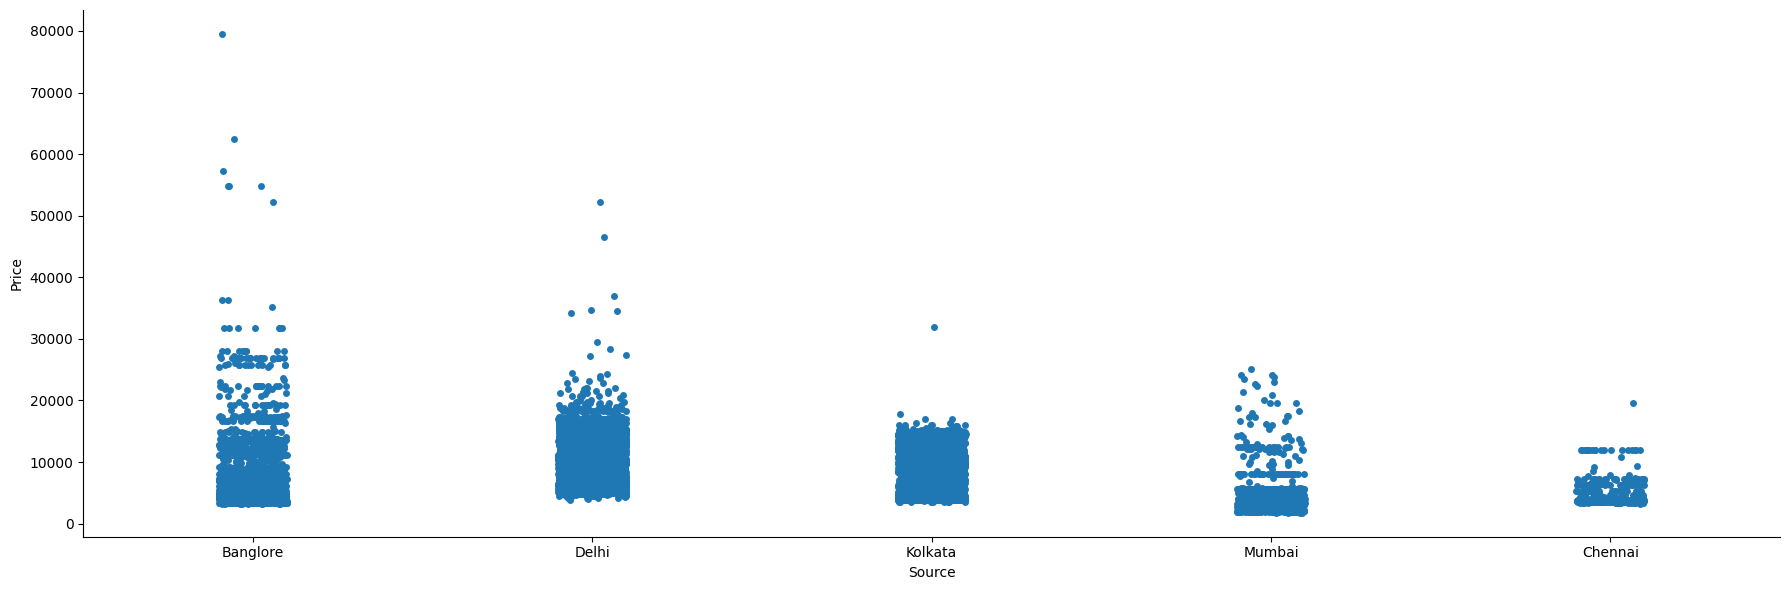

In [200]:
#Visualisation using catplots
sns.catplot(y='Price', x='Source', data = flight.sort_values('Price',ascending=False) , kind='strip' , height=6 , aspect=3)

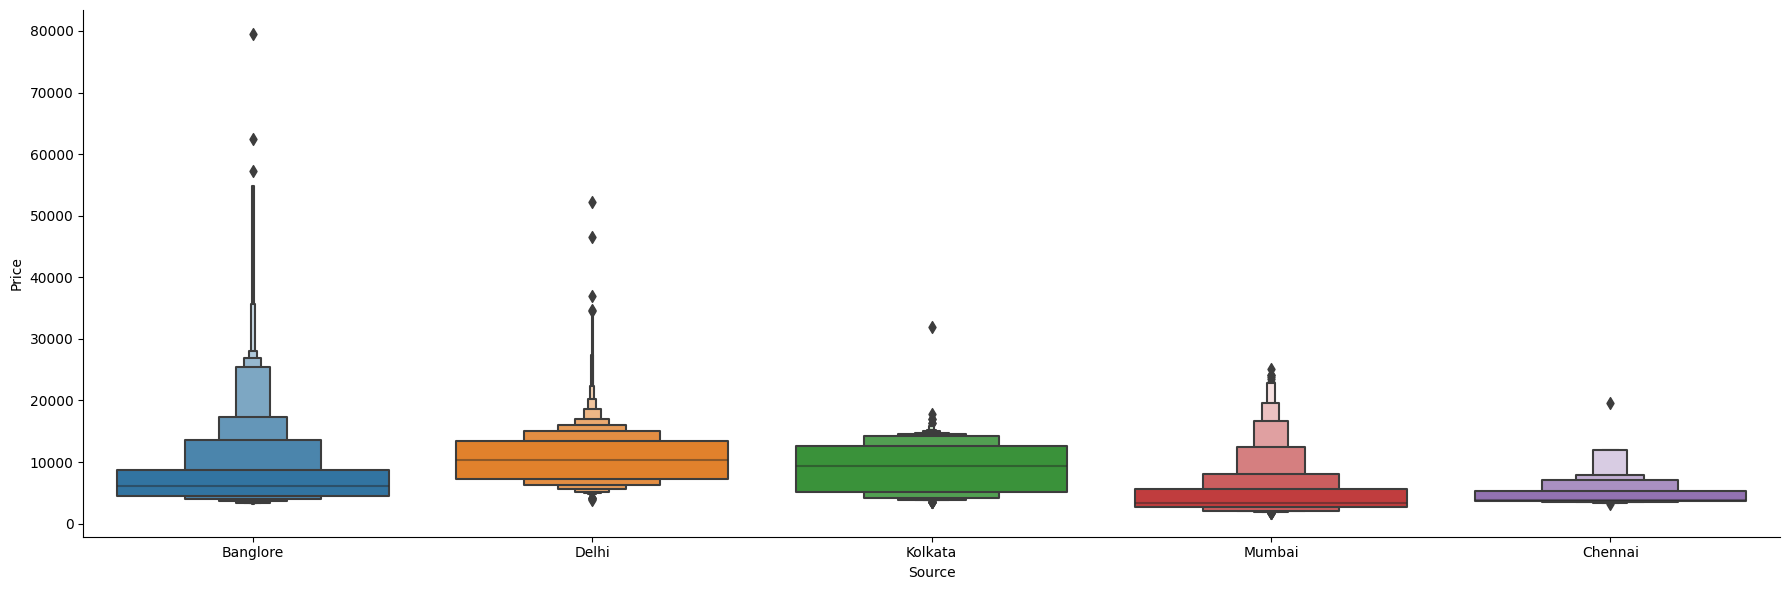

In [201]:
#Visualisation using catplots
sns.catplot(y='Price', x='Source', data = flight.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

In [202]:
#One Hot Coding_002 --Source
Source = flight[['Source']]
# [['Source']] adds a prefix to the actual source
Source = pd.get_dummies(Source , drop_first=True) #drop_first = True >> deletes redundant data
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [203]:
#Feature Engineering_007 -- Destination
#One Hot Coding_003 --Destination
flight['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [204]:
#One Hot Coding_003 --Destination
Destination = flight[['Destination']] 
#[['destiantion']] adds a prefix to the actual destination
Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [205]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [206]:
# cleaning_datasset_004 -- removing Columns 
# >> Route followed and Availability of meals are not included in our project for prediction of price
flight.drop(columns=['Route','Additional_Info'] , axis=1 , inplace=True)
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [207]:
#Feature Engineering_008 -- Ordinal and Integer Encoding on No.of stops
flight['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [208]:
#Integer Encoding -- we assign integers to the string of the dataset
flight.replace({'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 , '4 stops':4 , } , inplace=True)

In [209]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [210]:
#concatination all the data sets created and exixting
flight = pd.concat([flight , Airline , Source , Destination] , axis=1)

In [211]:
#cleaning dataset_005 -- dropping Airline , Source and Destintion columns
flight.drop(columns=['Airline' , 'Source' , 'Destination'] , inplace=True)

In [218]:
#displaying all rows & columns
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [219]:
flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [212]:
#final_dataset
flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [213]:
#final_dataset
flight.shape

(10682, 30)

In [214]:
#final_dataset
flight.describe()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
#final_dataset
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_Day                        10682 non-null  int64
 3   Journey_Month                      10682 non-null  int64
 4   Dep_hour                           10682 non-null  int64
 5   Dep_Minute                         10682 non-null  int64
 6   Arrival_hour                       10682 non-null  int64
 7   Arrival_Minute                     10682 non-null  int64
 8   Duration_Hour                      10682 non-null  int64
 9   duration_Minute                    10682 non-null  int64
 10  Air India                          10682 non-null  uint8
 11  GoAir                              10682 non-null  uint8
 12  IndiGo            

In [ ]:
################-----TEST----################

In [228]:
#Loading testing data_set
flight_test = pd.read_excel('/Users/klaus/Downloads/Data_Test_001.xlsx' , engine = 'openpyxl')
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [229]:
print("-"*50)
print("Shape")
print(flight_test.shape)

print("-"*50)
print("Info")
print(flight_test.info())

print("-"*50)
print("Duration count values")
print(flight_test['Duration'].value_counts())

print("-"*50)
print("Check null value")
print(flight_test.isnull().sum())

print("-"*50)
print("Drop null value rows")
flight_test.dropna(inplace=True)

print("-"*50)
print("Check null values")
print(flight_test.isnull().sum())

print("-"*50)
print("Fetch journey day and month from Date_of_Journey")
flight_test['Journey_Day'] = pd.to_datetime(
    flight_test.Date_of_Journey, format='%d/%m/%Y').dt.day
flight_test['Journey_Month'] = pd.to_datetime(
    flight_test.Date_of_Journey, format='%d/%m/%Y').dt.month
print(flight_test.head())

print("-"*50)
print("Fetch Departure hours and minutes from Dep_Time")
flight_test['Dep_hour'] = pd.to_datetime(flight_test.Dep_Time).dt.hour
flight_test['Dep_Minute'] = pd.to_datetime(flight_test.Dep_Time).dt.minute
print(flight_test.head())

print("-"*50)
print("Drop Dep_time and Date_of_Journey columns")
flight_test.drop(columns=['Dep_Time', 'Date_of_Journey'], inplace=True)

print("-"*50)
print("Fetch journey hours and minutes from Arrival_Time")
flight_test['Arrival_hour'] = pd.to_datetime(flight_test.Arrival_Time).dt.hour
flight_test['Arrival_Minute'] = pd.to_datetime(
    flight_test.Arrival_Time).dt.minute
print(flight_test.head())

print("-"*50)
print("Drop Arrival_Time columns")
flight_test.drop(columns='Arrival_Time', inplace=True)

print("-"*50)
print("Fetch  hours and minutes from Durations")

duration = list(flight_test.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration = duration
duration_hour = []
duration_minute = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_minute.append(int(duration[i].split('m')[0].split()[-1]))

flight_test['Duration_Hour'] = duration_hour
flight_test['Duration_Minute'] = duration_minute
flight_test.drop(columns='Duration', inplace=True)

print("-"*50)
print("Count Airline values")
print(flight_test['Airline'].value_counts())


print("-"*50)
print("OneHotEncoder on Airline Column")
Airline = flight_test['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
print(Airline.head())

print("-"*50)
print("Count Source values")
print(flight_test['Source'].value_counts())


print("-"*50)
print("Count Source values")
print(flight_test['Source'].value_counts())

print("-"*50)
print("OneHotEncoder on Source Column")
Source = flight_test[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
print(Source.head())

print("-"*50)
print("Count Destination values")
print(flight_test['Destination'].value_counts())

print("-"*50)
print("OneHotEncoder on Destination Column")
Destination = flight_test[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
print(Destination.head())

print("-"*50)
print("Show route")
print(flight_test['Route'])

print("-"*50)
print("Drop Route and Additional_Info")
flight_test.drop(columns=['Route', 'Additional_Info'], axis=1, inplace=True)

print("-"*50)
print("Cout Total_Stops")
print(flight_test['Total_Stops'].value_counts())

print("-"*50)
print("Normalize total stops")
flight_test.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2,'3 stops': 3, '4 stops': 4}, inplace=True)

print("-"*50)
print("Concate flight, airline, source and destionation")
flight_test = pd.concat([flight_test, Airline, Source, Destination], axis=1)

print("-"*50)
print("Show all rows and columns")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("-"*50)
print("Drop Airline, Source and Destination")
flight_test.drop(columns=['Airline', 'Source', 'Destination'], inplace=True)

print("-"*50)
print("Show head")
print(flight_test.head())

print("-"*50)
print("Shape")
print(flight_test.shape)


--------------------------------------------------
Shape
(2671, 10)
--------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
--------------------------------------------------
Duration count values
2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
2h 35m      70
2h 30m      58
2h 

In [231]:
flight.shape , flight_test.shape

((10682, 30), (2671, 28))

In [232]:
#Feature Selection
#X = all independent features , Y= dependent (Price)
X = flight.drop(columns='Price', axis=1)
y = flight['Price']
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [233]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

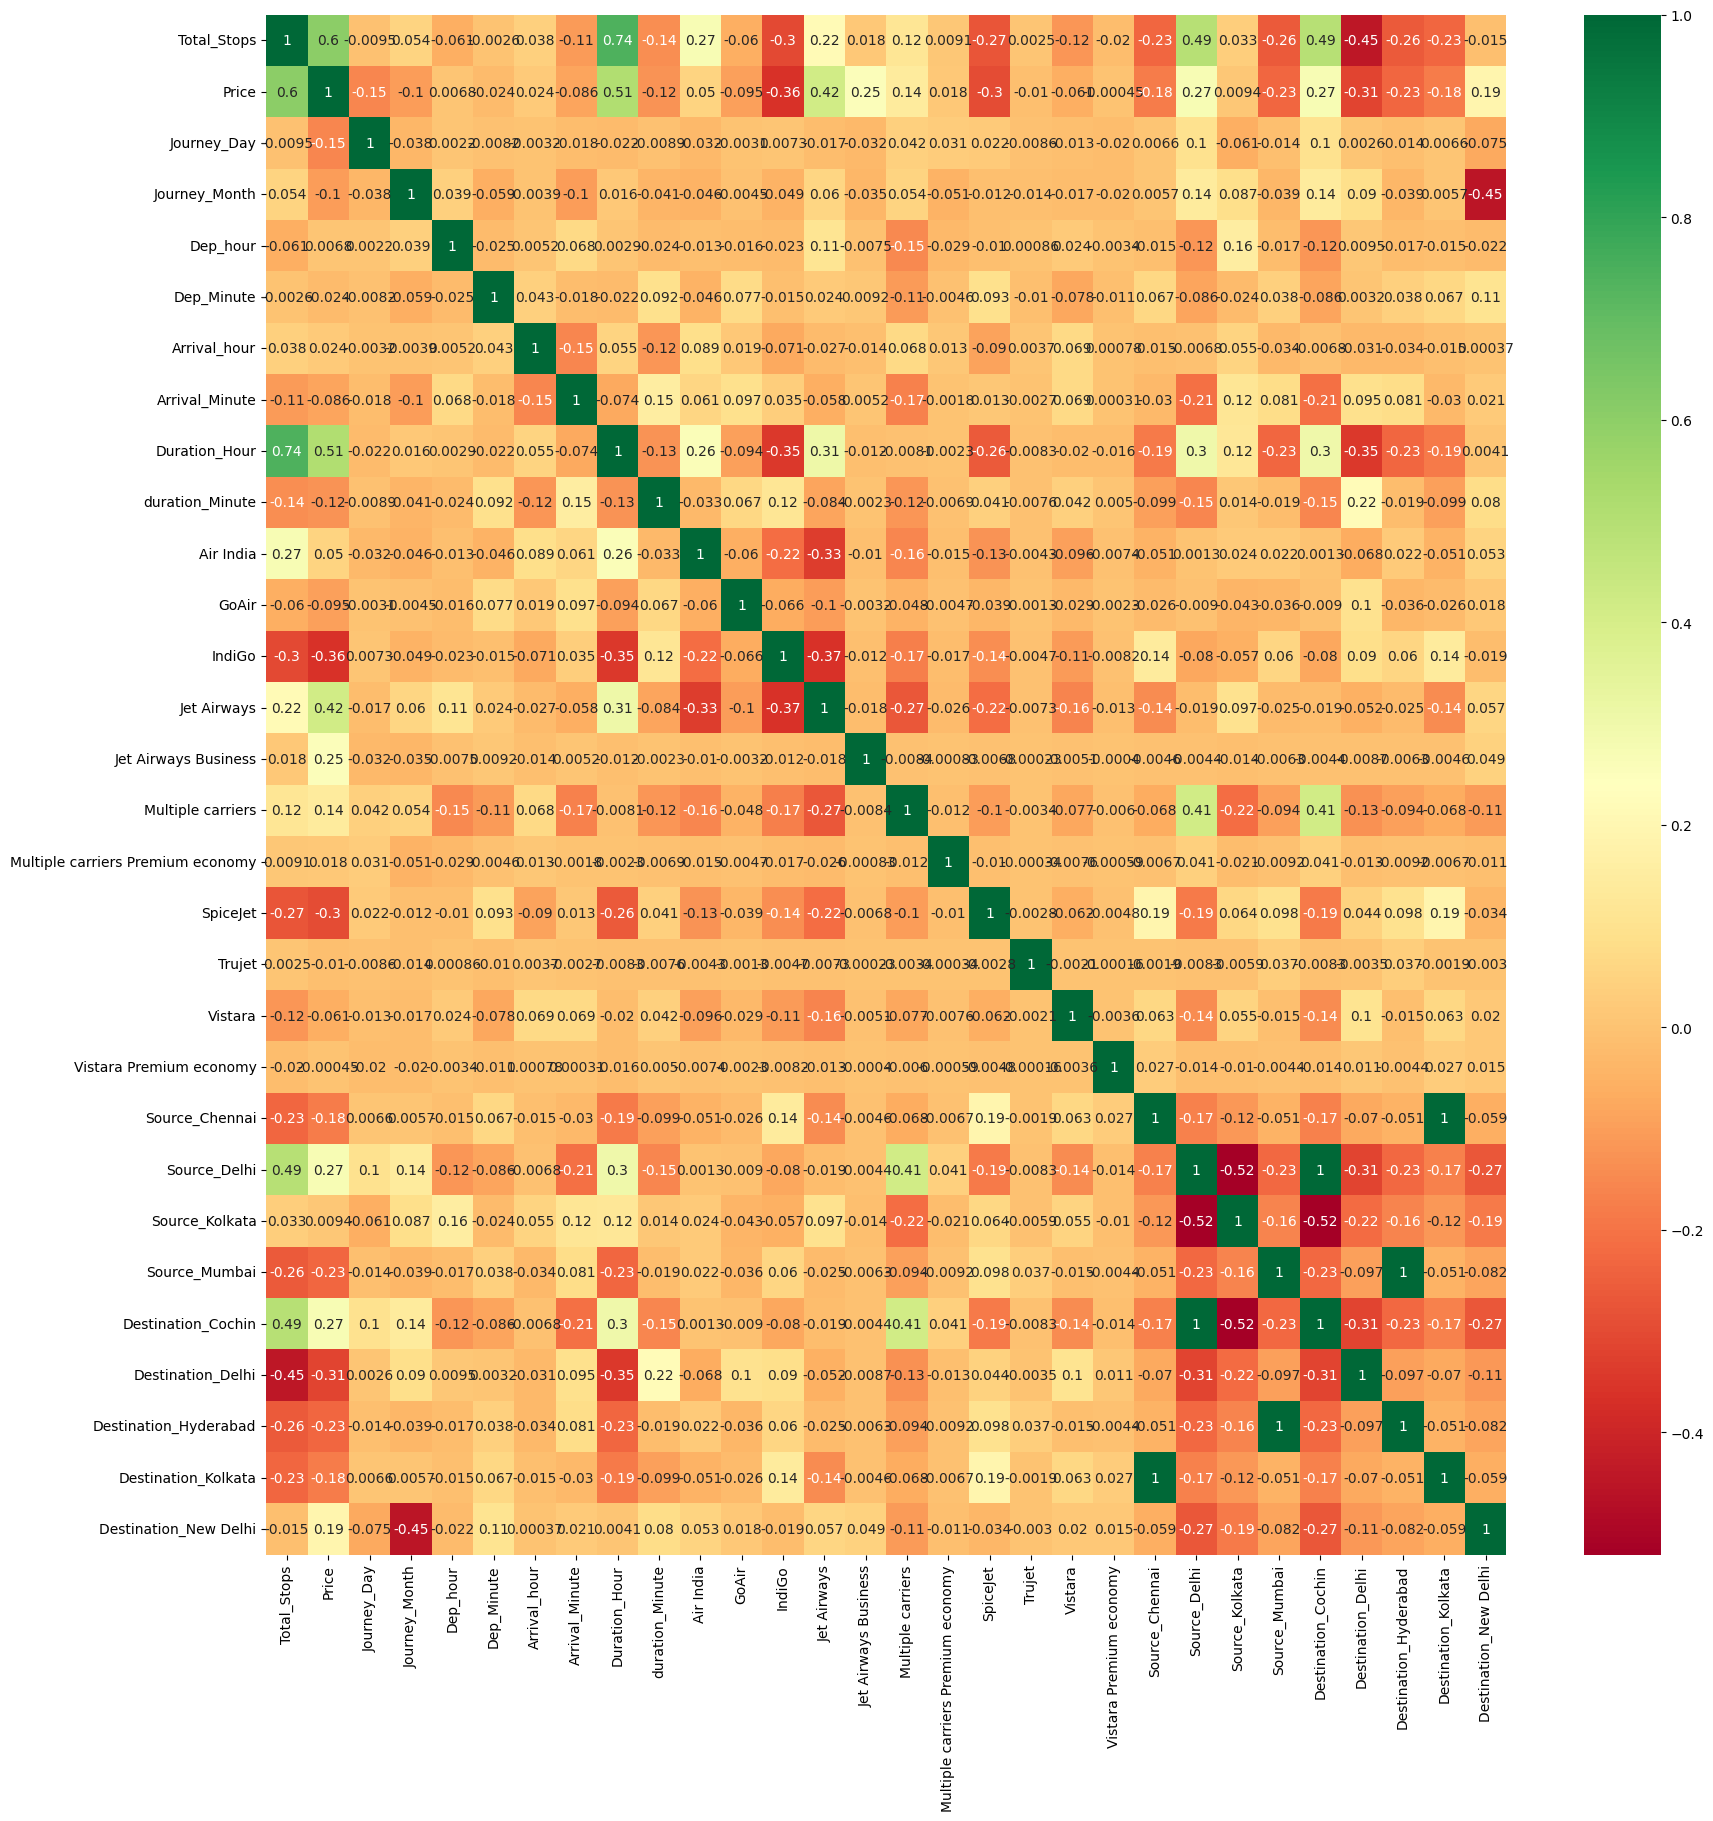

In [234]:
#Correlation graph(heat graph)
plt.figure(figsize=(20, 20))
sns.heatmap(flight.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
#----------------- Fit Model with Random Forest------------------#
# Random Forest Regressor helps when more decision are combined and in improving the prediction by averaging the aggregate of hte decision trees

In [235]:
#importing libs
from sklearn.model_selection import train_test_split
#splitting the dataset in 8:2 into testing and training
X_train , X_test , y_train , y_test = train_test_split (X,y,test_size =0.2 , random_state=51)

In [236]:
# Fitting the Traning Model into RFR
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [237]:
#defining predictionon X_test by RFR
pred = rfr.predict(X_test)

In [238]:
#Score of prediction on X, Y training datasets
rfr.score(X_train , y_train)

0.9542744717488972

In [240]:
#Score of prediction on X, Y testing datasets
rfr.score(X_test, y_test)

0.8280415413399543

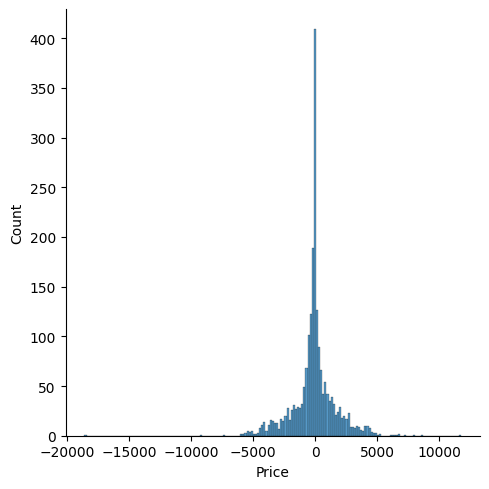

In [241]:
#err plotting in the prediction
#Normal distribution in the err graph in prediction
sns.displot(y_test - pred)

Text(0, 0.5, 'pred')

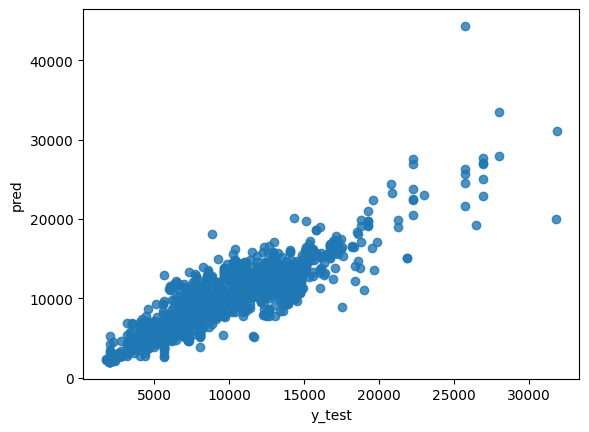

In [242]:
##err plotting in the prediction
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [243]:
# SDA - Staistical Data analysis on the dataset
# y = dependent -- price and x= all independent 
# pred = prediction function defined
from sklearn import metrics
print('MAE:' , metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test , pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test , pred)))

MAE: 1128.5248323075045
MSE: 3223584.0953361965
RMSE: 1795.4342358705865


In [244]:
#r2 scored tells about the proportion of variance in the dependent variable that is predicatable from independent variables
metrics.r2_score(y_test , pred)

0.8280415413399543

In [ ]:
#-----------------HYPERPARAMETER TUNING----------------#
#Hyperparameter tuning helps in finding a set of hyper parameter values for
#  learning algorithm while optimising hte applying alg#

In [245]:
#RaandomizedSearchCV implemnts a fit and score method on pred and finetune the model

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100, 2000, 10)]
max_depth = [int(x) for x in np.linspace(100, 2000, 10)]
min_samples_split = [2, 4, 6, 8, 10, 12, 14]
min_samples_leaf = [1, 3, 5, 7, 8, 10]
max_features = ['sqrt', 'log2', 'auto', N
one]
#creating a dictionary of the parameters
random_search = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,

}

random_search


{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [246]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_search, n_iter=10, cv=5, verbose=2, random_state=51, n_jobs=1)


In [247]:
#Training the model with RSCV
rfr_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.7s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   5.2s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   5.2s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  18.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  18.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  18.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  18.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  18.2s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=522, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_depth=522, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_dept

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  15.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  15.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  15.4s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  15.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  15.2s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  17.6s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  17.7s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  17.9s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  17.5s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  17.5s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1366; total time=   4.2s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1366; total time=   4.2s
[CV] END 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [248]:
#better parameters for better accuracy in prediction
rfr_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 522}

In [249]:
#defining prediction and testing
prediction = rfr_random.predict(X_test)

/var/folders/x2/tc__mtr132z6wx02sw1rnzcr0000gn/T/ipykernel_59935/3865557949.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


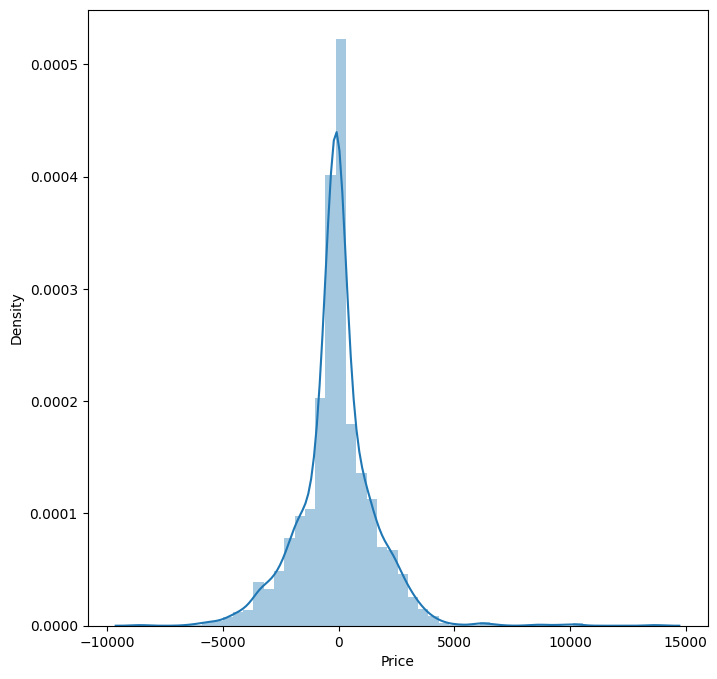

In [250]:
#err plotting
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

Text(0, 0.5, 'pred')

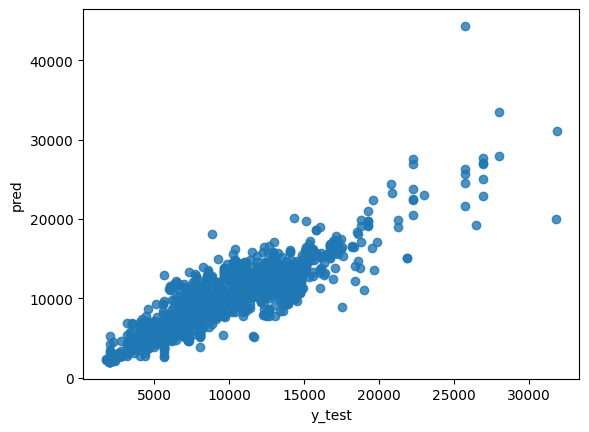

In [251]:
##err plotting in the prediction on testing Dataset
plt.scatter(y_test, pred, alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')


In [253]:
# SDA - Staistical Data analysis on the dataset
# y = dependent -- price and x= all independent
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 1087.7964874552622
MSE: 2672956.7269402836
RMSE: 1634.9179572505416


In [254]:
metrics.r2_score(y_test , prediction)

0.8574141374209395

In [255]:
#Saving the model
import pickle
file = open('Flight-Fare-Prediction.pkl','wb')
pickle.dump(rfr_random,file)

In [256]:
#loading the model
model = open('Flight-Fare-Prediction.pkl', 'rb')
mod = pickle.load(model)


In [257]:
#testing
predicted_data = mod.predict(X_test)


In [258]:
metrics.r2_score(y_test,predicted_data)

0.8574141374209395